출처 : 
https://junsik-hwang.tistory.com/37?category=803034

https://junsik-hwang.tistory.com/38?category=803034

https://ysyblog.tistory.com/118?category=1170736

![](image/%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.png)

## 상관분석

상관관계를 확인하고자 하는 두 데이터의 데이터 종류가 등간척도, 비율척도 일 때는 피어슨 상관계수를 계산하고, 서열척도 일 때는 스피어만 상관계수를 사용한다. 

더 자세하게는 정규성 검정을 했을 때 정규성을 만족한다면, 모수적 방법인 피어슨 상관 계수를 사용하고, 정규성을 만족하지 못하거나(정규 분포를 따르지 않거나) 표본의 개수가 10개 미만일 때는 비모수적 방법인 스피어만과 켄달 방법을 사용한다.

그리고 두 변수가 명목척도일 때는 카이제곱 검정통계량을 통한 교차분석을 진행하여 상관관계의 유의성을 확인할 수 있다. 

상관분석은 직선(선형)의 관계가 있는지 분석하는 것.
상관분석에서 알아야 할 점은 **산점도** , **상관계수** 이다.

종종 어떤 두 사건 간의 연관성을 분석해야 할 경우에 사용하는 분석법. 정확히는 두 변수 간에 어떤 선형적 관계를 가지는지 분석하는 기법으로, 이를 상관계수를 이용하여 측정하는 것이다.

원인과 결과에 대한 분석이 필요하다면 상관분석이 아니라 회귀분석을 수행해야 한다.

상관계수를 파악하기 전에 산점도를 그려 두 변수 간의 관련성을 시각적으로 파악할 수 있음.

**유의할점**
* 두 변수의 관계가 선형적(= 직선)인지 확인할 것!
    * 산점도을 그려서 확인
    * 명확하게 두 변수의 관계가 곡선 형태라면 spearman이나 kendall의 방법을 사용

#### 산점도

산점도를 이용하면 두 변수간의 직선적인 관계를 대략적으로 파악은 가능하지만, 두 변수 사이의 관계를 어떠한 수치로 표현하지는 않아요. 

그렇기에 우리는 두 변수 간의 관계를 수치로 표현하기 위해 공분산 및 상관계수를 이용합니다.

그러나 공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계가 있습니다. 그래서 공분산을 표준화 시킨 상관계수를 보다 많이 이용합니다.

출처: https://ordo.tistory.com/100 [우 주 신:티스토리]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
data = datasets.load_diabetes()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


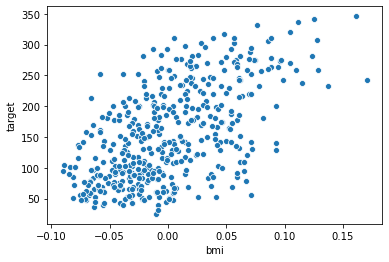

In [3]:
sns.scatterplot(data=df, x='bmi', y='target')

#bmi와 당뇨수치의 산점도

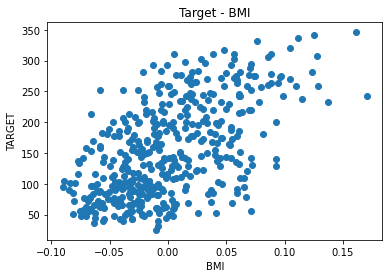

In [4]:
plt.scatter(df['bmi'], df['target'])
plt.title('Target - BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()

#bmi와 당뇨수치의 산점도

#### 피어슨 상관계수

피어슨 상관계수의 가정 

1. 두 변수는 연속형 변수이다.

2. 두 변수는 정규분포를 따른다.
    (간혹 한 변수만 정규분포를 따라도 된다고는 하지만, 이론적으로는 두 변수 모두 정규분포를 따라야합니다.)
    (정규성 가정을 통해 확인)

3. 두 변수는 선형 관계를 가진다. (산점도를 보고 확인)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp      0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1      0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5      0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6      0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

              s4        s5        s6   

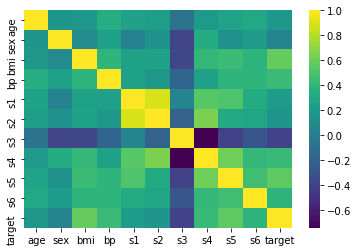

In [9]:
corr = df.corr(method='pearson') #kendall, pearson, spearman
print(corr)
 
sns.heatmap(corr, cmap='viridis')
plt.show()
 
#출처: https://wikidocs.net/78784


위처럼 한번에 비교할 수도 있지만, 아래처럼 필요한 변수만을 뽑아서 상관분석을 진행할 수도 있음.

또한 p-value를 확인하여 신뢰할 수 있는 상관분석인가를 확인할 수 있다.

원래는 정규성을 만족하는가를 검사해야 하지만 만족하는 것으로 가정함.

In [36]:
from scipy.stats import pearsonr

pearsonr(df['bmi'], df['target'])

# (상관계수, p-value)
# 귀무가설 - '상관계수는 0이다' = 상관관계가 없다.
# 대립가설 - '상관계수가 0이 아니다' = '상관관계가 존재한다'

# p-value가 0.05보다 작으므로 귀무가설을 기각한다.
# 따라서 bmi와 당뇨수치는 상관관계가 존재한다.

(0.5864501344746886, 3.4660064451655095e-42)

#### 스피어만 상관계수

스피어만 상관계수의 가정(켄달 타우도 같음)

1. 두 변수는 적어도 순서형 변수이다.

2. 두 변수는 단조 관계를 가진다.

https://lunch-box.tistory.com/110

상관관계를 분석하고자 하느 두 연속형 변수의 분포가 심각하게 정규 분포를 벗어난다거나 또는 두 변수가 **순위 척도** 자료형일 때 사용하는 상관분석 방법.

(하지만 순위척도가 아니라 등간/비율척도를 사용한 변수들이라 하더라도, 두 변수 간의 관계가 비선형적 일 때 사용가능하다.)

예를 들어, 어떤 고등학교 3학년 학생들의 모의고사 성적을 각 과목별로 등수로 매겼을 때 언어 영역의 등수와 수리 영역의 등수가 서로 상관 관계가 있는지는 스피어만 상관 계수로 알아볼 수 있습니다.

https://m.blog.naver.com/istech7/50153047118

In [43]:
from scipy.stats import shapiro

print(shapiro(df['bmi']))
print(shapiro(df['target']))

# 두 변수 모두 유의확률 0.05보다 작으므로 정규성을 만족하지 못한다.

(0.9728218913078308, 2.5203468112522387e-07)
(0.9490576386451721, 3.363437653391976e-11)


In [44]:
from scipy.stats import spearmanr

spearmanr(df['bmi'], df['target'])

# 귀무가설을 기각
# 상관관계가 존재한다.

SpearmanrResult(correlation=0.5613820101065616, pvalue=4.567023927725032e-38)

#### 켄달 - 타우

In [51]:
from scipy.stats import kendalltau

kendalltau(df['bmi'], df['target'])

# 귀무가설을 기각
# 상관관계가 존재한다.

KendalltauResult(correlation=0.39119525733058874, pvalue=2.240475743694334e-34)

### 상관분석 결과 해석 시 유의할 점

* 두 변수의 상관관계는 인과관계를 담보하지 않음
    * 상관관계가 있다고 반드시 인과관계가 있는 것은 아님

* 제3 변인의 문제
    * 도시 내 범죄 발생 건수와 종교 시설의 수는 양의 상관 관계가 있음
    * 범죄가 많아서 종교에 의존하는가? 또는 종교가 범죄를 부추기는가?
    * 사실은 인구가 많아지면 범죄도 늘고, 종교 시설도 많아짐.
    
* 극단치(outliers)에 의한 인위적 상관 존재 가능성
    * 자료 내에 극단치가 있을 때, 존재하지 않는 상관관계가 포착되거나, 존재하는 상관관계가 포착되지 못하는 경우가 생기기도 함

* 이질적인 집단들의 합 (심슨의 역설)
    * 각 집단별 상관관계와 전체 총합의 상관관계는 다를 수 있음
    * 상관분석 결과가 예상과 다를 경우, 이질적인 하위집단들이 존재하는지 살펴봐야 할 수도 있음